# UFC Predictions

### Step 1: Load Data

The following CSV files were retrieved from the Kaggle UFC dataset.

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

pd.options.display.max_columns = 999

dat_df = pd.read_csv("https://raw.githubusercontent.com/ekoly/DS-Unit-2-Applied-Modeling/master/data/ufc/data.csv")
prep_dat_df = pd.read_csv("https://raw.githubusercontent.com/ekoly/DS-Unit-2-Applied-Modeling/master/data/ufc/preprocessed_data.csv")
raw_fighters_df = pd.read_csv("https://raw.githubusercontent.com/ekoly/DS-Unit-2-Applied-Modeling/master/data/ufc/raw_fighter_details.csv")
raw_dat_df = pd.read_csv("https://raw.githubusercontent.com/ekoly/DS-Unit-2-Applied-Modeling/master/data/ufc/raw_total_fight_data.csv", sep=";")

dat_df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,135.0,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,

In [12]:
# I'd like to have one row per fighter per fight. That is, 2 rows per fight, with a simple "is_winner" column.

import re


r_fighter_cols = [col for col in dat_df.columns if col.startswith("R_")]
b_fighter_cols = [col for col in dat_df.columns if col.startswith("B_")]

other_cols = [col for col in dat_df.columns if col not in r_fighter_cols and col not in b_fighter_cols]

def extractFighters(dat_df, fighter_cols, opp_cols, fighter_prefix, opp_prefix, fighter_color):

    fighters_df = dat_df[fighter_cols + other_cols].copy()
    fighters_df.columns = [col.replace(fighter_prefix, "") for col in fighters_df.columns]
    fighters_df["is_winner"] = fighters_df["Winner"] == fighter_color

    opp_df = dat_df[opp_cols].copy()
    opp_df.columns = [re.sub(r"^" + opp_prefix, "opponent_", col) for col in opp_df.columns]

    fighters_df = pd.concat([fighters_df, opp_df], axis=1)
    
    return fighters_df

r_fighters_df = extractFighters(dat_df, r_fighter_cols, b_fighter_cols, "R_", "B_", "Red")
b_fighters_df = extractFighters(dat_df, b_fighter_cols, r_fighter_cols, "B_", "R_", "Blue")

fighters_df = pd.concat([r_fighters_df, b_fighters_df], axis=0)
fighters_df.head()

,Height_cms,Reach_cms,Referee,Stance,Weight_lbs,Winner,age,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SIG_STatt,avg_SIG_STlanded,avg_SIG_STpct,avg_SUATT,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,avg_TOTAL_STatt,avg_TOTAL_STlanded,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SIG_STatt,avg_opp_SIG_STlanded,avg_opp_SIG_STpct,avg_opp_SUATT,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,avg_opp_TOTAL_STatt,avg_opp_TOTAL_STlanded,current_lose_streak,current_win_streak,date,draw,fighter,is_winner,location,longest_win_streak,losses,no_of_rounds,opponent_Height_cms,opponent_Reach_cms,opponent_Stance,opponent_Weight_lbs,opponent_age,opponent_avg_BODY_att,opponent_avg_BODY_landed,opponent_avg_CLINCH_att,opponent_avg_CLINCH_landed,opponent_avg_DISTANCE_att,opponent_avg_DISTANCE_landed,opponent_avg_GROUND_att,opponent_avg_GROUND_landed,opponent_avg_HEAD_att,opponent_avg_HEAD_landed,opponent_avg_KD,opponent_avg_LEG_att,opponent_avg_LEG_landed,opponent_avg_PASS,opponent_avg_REV,opponent_avg_SIG_STR_att,opponent_avg_SIG_STR_landed,opponent_avg_SIG_STR_pct,opponent_avg_SUB_ATT,opponent_avg_TD_att,opponent_avg_TD_landed,opponent_avg_TD_pct,opponent_avg_TOTAL_STR_att,opponent_avg_TOTAL_STR_landed,opponent_avg_opp_BODY_att,opponent_avg_opp_BODY_landed,opponent_avg_opp_CLINCH_att,opponent_avg_opp_CLINCH_landed,opponent_avg_opp_DISTANCE_att,opponent_avg_opp_DISTANCE_landed,opponent_avg_opp_GROUND_att,opponent_avg_opp_GROUND_landed,opponent_avg_opp_HEAD_att,opponent_avg_opp_HEAD_landed,opponent_avg_opp_KD,opponent_avg_opp_LEG_att,opponent_avg_opp_LEG_landed,opponent_avg_opp_PASS,opponent_avg_opp_REV,opponent_avg_opp_SIG_STR_att,opponent_avg_opp_SIG_STR_landed,opponent_avg_opp_SIG_STR_pct,opponent_avg_opp_SUB_ATT,opponent_avg_opp_TD_att,opponent_avg_opp_TD_landed,opponent_avg_opp_TD_pct,opponent_avg_opp_TOTAL_STR_att,opponent_avg_opp_TOTAL_STR_landed,opponent_current_lose_streak,opponent_current_win_streak,opponent_draw,opponent_fighter,opponent_longest_win_streak,opponent_losses,opponent_total_rounds_fought,opponent_total_time_fought(seconds),opponent_total_title_bouts,opponent_win_by_Decision_Majority,opponent_win_by_Decision_Split,opponent_win_by_Decision_Unanimous,opponent_win_by_KO/TKO,opponent_win_by_Submission,opponent_win_by_TKO_Doctor_Stoppage,opponent_wins,title_bout,total_rounds_fought,total_time_fought(seconds),total_title_bouts,weight_class,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins
0,162.56,162.56,Marc Goddard,Orthodox,135.0,Red,32.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,NaN,NaN,NaN,101.400000,44.000000,0.466000,NaN,0.100000,5.300000,1.900000,0.458000,NaN,NaN,129.900000,69.100000,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,NaN,NaN,NaN,98.800000,32.200000,0.336000,NaN,0.000000,0.900000,0.100000,0.050000,NaN,NaN,110.500000,43.300000,0.0,4.0,2019-06-08,0.0,Henry Cejudo,True,"Chicago, Illinois, USA",4.0,2.0,5,167.64,170.18,Orthodox,135.0,31.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400

In [13]:

for col in [col for col in fighters_df.select_dtypes(include="number").columns if col.startswith("opponent_")]:
    
    col2 = col
    col1 = col[9:]
    
    fighters_df[col1 + "_ratio"] = (fighters_df[col1] + 1) / (fighters_df[col2] + 1)
    
# prevent leakage
fighters_df = fighters_df.drop(columns="Winner")

# change prefixes to suffixes
fighters_df.columns = [col[9:] + "_opponent" if col.startswith("opponent_") else col for col in fighters_df.columns]


### Step 2: Establish Baseline

This is expected to be exactly 50% because for every winner there is a loser.

In [14]:
from sklearn.metrics import accuracy_score

majority_class = fighters_df["is_winner"].mode()[0]
baseline_pred = [majority_class] * len(fighters_df)
baseline_acc = accuracy_score(baseline_pred, fighters_df["is_winner"]) * 100

print(f"""
    Majority class: {majority_class}
    Baseline accuracy: {baseline_acc:.2f}%
""")


    Majority class: False
    Baseline accuracy: 50.81%



##### Explanation

It turns out 50.81% have False for "is_winner". This is probably because in the case of ties, neither fighter is considered the winner.

### Step 3: Linear Model

We will use a `LogisticRegression` and see if we can beat the baseline.

In [15]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression


train, test = train_test_split(fighters_df)

target = "is_winner"
features = fighters_df.columns.drop([target] + ["age", "age_opponent", "Referee", "date"])

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [16]:
lr_pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy="constant", fill_value="0"),
    LogisticRegression(max_iter=333),
)

lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)

lr_score = accuracy_score(y_pred, y_test)*100
improvement = lr_score - baseline_acc

print(f"""
    Accuracy score for LogisticRegression: {lr_score:.2f}%
    Improvement over baseline: {improvement:.2f}%
""")

/home/cowley/venv/lambda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



    Accuracy score for LogisticRegression: 65.36%
    Improvement over baseline: 14.55%



We achieved a notable improvement over baseline with a logistic regression.

### Step 4: Try RandomForestClassifier

We will use a `RandomForestClassifier` and see if we can beat the logistic regression.

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc_pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy="constant", fill_value=0),
    RandomForestClassifier(n_jobs=-1, n_estimators=220),
)

rfc_pipeline.fit(X_train, y_train)
y_pred = rfc_pipeline.predict(X_test)

rfc_score = accuracy_score(y_pred, y_test)*100
improvement_base = rfc_score - baseline_acc
improvement_lr = rfc_score - lr_score

print(f"""
    Accuracy score for Random Forest: {rfc_score:.2f}%
    Improvement over baseline: {improvement_base:.2f}%
    Improvement over logistic: {improvement_lr:.2f}%
""")


    Accuracy score for Random Forest: 66.76%
    Improvement over baseline: 15.95%
    Improvement over logistic: 1.40%



### Step 5: Try XGBClassifier

We will use a `XGBClassifier` to see if we can beat the random forest.

The parameters were optimized with a `RandomizedSearchCV` in a separate notebook.

In [18]:
from xgboost import XGBClassifier

xgb_pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy="constant", fill_value=0),
    XGBClassifier(
        n_jobs=-1,
        n_estimators=220,
        max_depth=76,
        learning_rate=0.22,
    )
)


xgb_pipeline.fit(X_train, y_train)
y_pred = xgb_pipeline.predict(X_test)

xgb_score = accuracy_score(y_pred, y_test)*100
improvement_base = xgb_score - baseline_acc
improvement_lr = xgb_score - lr_score
improvement_rfc = xgb_score - rfc_score

print(f"""
    Accuracy score for XGB: {xgb_score:.2f}%
    Improvement over baseline: {improvement_base:.2f}%
    Improvement over logistic: {improvement_lr:.2f}%
    Improvement over random forest: {improvement_rfc:.2f}%
""")


    Accuracy score for XGB: 66.95%
    Improvement over baseline: 16.15%
    Improvement over logistic: 1.59%
    Improvement over random forest: 0.19%



### Step 6: Permutation Importance

Analyze which features may detract from the accuracy.

In [19]:
from eli5.sklearn import PermutationImportance

transformer = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy="constant", fill_value=0),
)

X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

/home/cowley/venv/lambda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/cowley/venv/lambda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [20]:
from matplotlib import pyplot as plt

model = XGBClassifier(
    n_jobs=-1,
    n_estimators=220,
    max_depth=76,
    learning_rate=0.22,
)
model.fit(X_train_transformed, y_train)

permuter = PermutationImportance(
    model,
    scoring="accuracy",
    n_iter=5,
)

permuter.fit(X_test_transformed, y_test)

PermutationImportance(cv='prefit',
                      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              learning_rate=0.22,
                                              max_delta_step=0, max_depth=76,
                                              min_child_weight=1, missing=None,
                                              n_estimators=220, n_jobs=-1,
                                              nthread=None,
                                              objective='binary:logistic',
                                              random_state=0, reg_alpha=0,
                                              reg_lambda=1, scale_pos_weight=1,
                                              seed=None, silent=None,
                  

In [21]:
feature_importances_plus_std = pd.Series(permuter.feature_importances_ + permuter.feature_importances_std_, features)

xgb_best_features = fighters_df.columns.drop([target] + ["age", "age_opponent", "Referee", "date"] + list(feature_importances_plus_std[feature_importances_plus_std <= 0].index))

X_train_xgb = train[xgb_best_features]
X_test_xgb = test[xgb_best_features]

xgb_pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy="constant", fill_value=0),
    XGBClassifier(
        n_jobs=-1,
        n_estimators=220,
        max_depth=76,
        learning_rate=0.22,
    )
)


xgb_pipeline.fit(X_train_xgb, y_train)
y_pred = xgb_pipeline.predict(X_test_xgb)

xgb_score2 = accuracy_score(y_pred, y_test)*100
improvement_base = xgb_score2 - baseline_acc
improvement_xgb = xgb_score2 - xgb_score

print(f"""
    Accuracy score for XGB with optimized features: {xgb_score2:.2f}%
    Improvement over baseline: {improvement_base:.2f}%
    Improvement over base XGB: {improvement_xgb:.2f}%
""")


    Accuracy score for XGB with optimized features: 66.25%
    Improvement over baseline: 15.45%
    Improvement over base XGB: -0.70%



Little difference.

Let's try again with Random Forest.

In [22]:
model = RandomForestClassifier(
    n_jobs=-1,
    n_estimators=220,
)
model.fit(X_train_transformed, y_train)

permuter = PermutationImportance(
    model,
    scoring="accuracy",
    n_iter=5,
)

permuter.fit(X_test_transformed, y_test)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [23]:
feature_importances_plus_std = pd.Series(permuter.feature_importances_ + permuter.feature_importances_std_, features)

rfc_best_features = fighters_df.columns.drop([target] + ["age", "age_opponent", "Referee", "date"] + list(feature_importances_plus_std[feature_importances_plus_std <= 0].index))

X_train_rfc = train[rfc_best_features]
X_test_rfc = test[rfc_best_features]

rfc_pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy="constant", fill_value=0),
    RandomForestClassifier(
        n_jobs=-1,
        n_estimators=220,
    )
)

rfc_pipeline.fit(X_train_rfc, y_train)
y_pred = rfc_pipeline.predict(X_test_rfc)

rfc_score2 = accuracy_score(y_pred, y_test)*100
improvement_base = rfc_score2 - baseline_acc
improvement_rfc = rfc_score2 - rfc_score

print(f"""
    Accuracy score for Random Forest with optimized features: {rfc_score2:.2f}%
    Improvement over baseline: {improvement_base:.2f}%
    Improvement over base RFC: {improvement_rfc:.2f}%
""")


    Accuracy score for Random Forest with optimized features: 66.84%
    Improvement over baseline: 16.03%
    Improvement over base RFC: 0.08%



To wrap up the permutations, I'd like to make two more visualizations showing the feature importances.

/home/cowley/venv/lambda/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


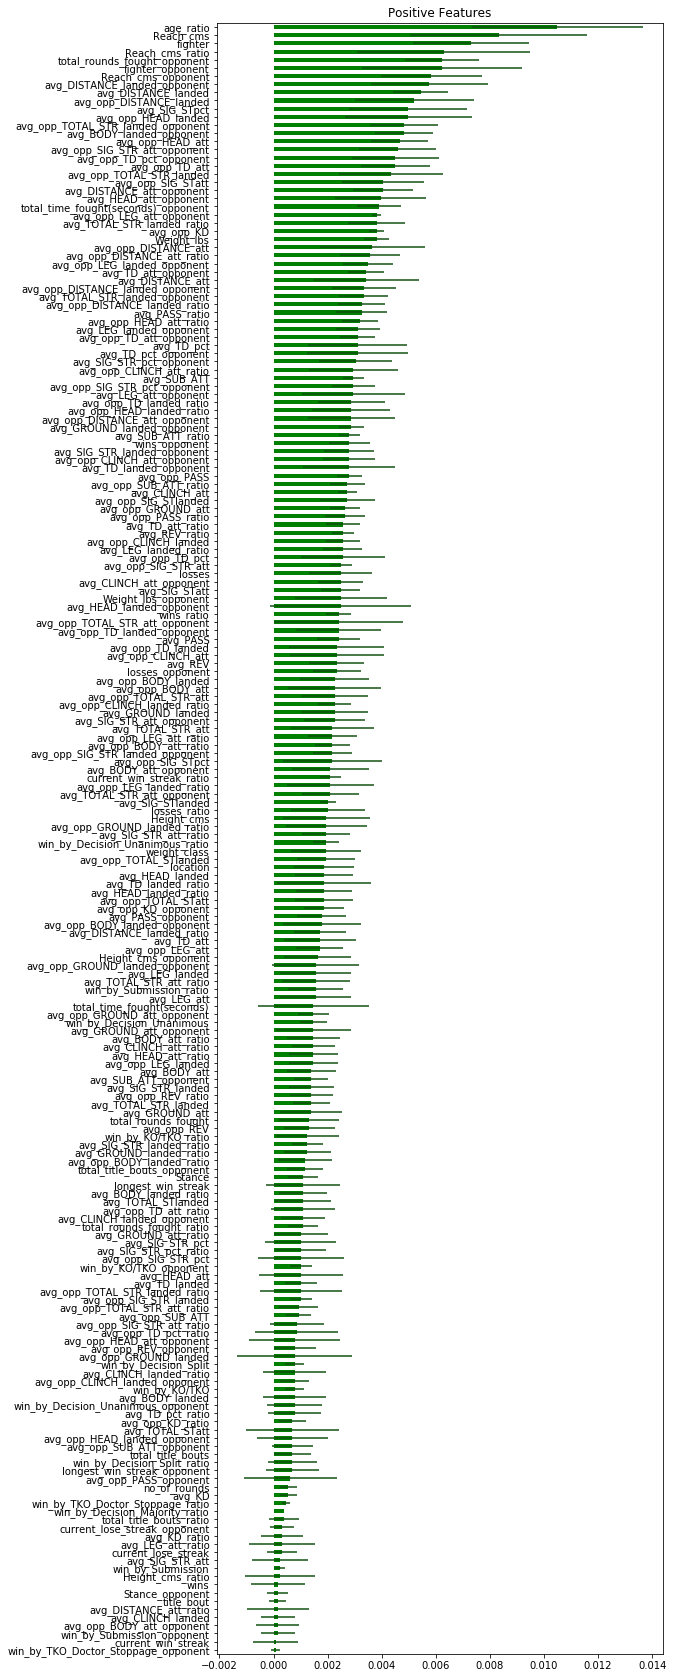

In [24]:
feature_importances = pd.Series(permuter.feature_importances_, features).sort_values()
feature_importances_std = pd.Series(permuter.feature_importances_std_, features).sort_values()

good_mask = feature_importances > 0
bad_mask = feature_importances <= 0

fig, ax = plt.subplots(figsize=(8, 30))

feature_importances[good_mask].plot.barh(color="green", ecolor="#105010", xerr=feature_importances_std[good_mask], ax=ax)
ax.set_title("Positive Features")

fig.show()

/home/cowley/venv/lambda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


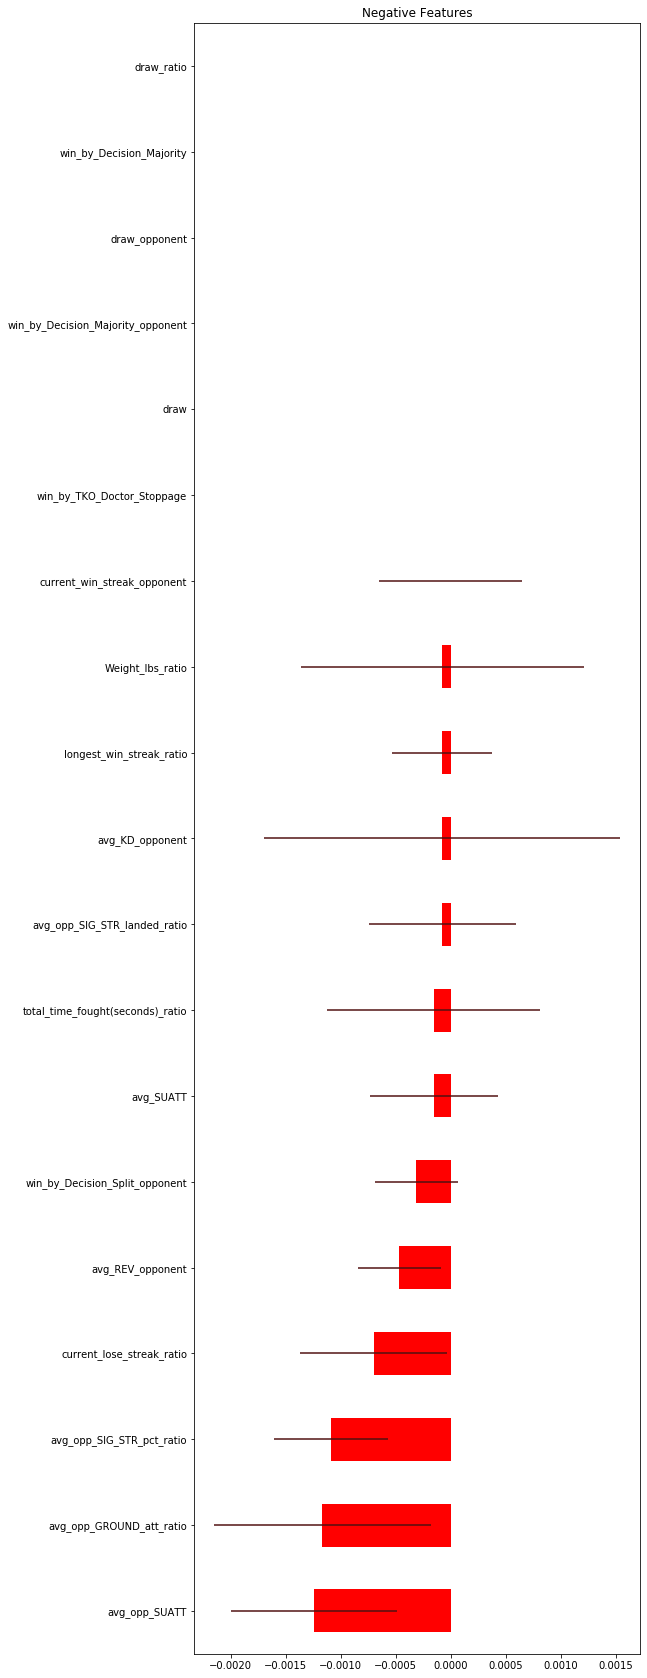

In [25]:
fig, ax = plt.subplots(figsize=(8, 30))

feature_importances[bad_mask].plot.barh(color="red", ecolor="#501010", xerr=feature_importances_std[bad_mask], ax=ax)
ax.set_title("Negative Features")

fig.show()

### Run More Tests

While the previous tests were purely numbers-based, the following human-oriented tests will predict the outcome of real high-profile matches. 

In [26]:


prefix_re = re.compile(r".*(_opponent)|(_ratio)$")

fighters_individual_df = fighters_df[[col for col in fighters_df.columns.drop(["is_winner"]) if not prefix_re.match(col)]]
latest_fights = fighters_individual_df.sort_values(by="date").groupby("fighter").tail(1)

def getByFighter(fighter_name):
    return latest_fights[latest_fights["fighter"] == fighter_name].copy()

def makeBoutDf(fighter1, fighter2):
    
    fighter1_df = getByFighter(fighter1)
    fighter2_df = getByFighter(fighter2)
    
    fighter1_df["temp_id_"] = fighter2_df["temp_id_"] = np.random.randint(2**31)
    fighter1_df, fighter2_df = (
        pd.merge(fighter1_df, fighter2_df, on="temp_id_", suffixes=("", "_opponent")),
        pd.merge(fighter2_df, fighter1_df, on="temp_id_", suffixes=("", "_opponent")),
    )
    
    fight_df = pd.concat([fighter1_df, fighter2_df])
    
    for col in [col for col in fight_df.select_dtypes(include="number").columns if col.endswith("_opponent")]:

        col2 = col
        col1 = col[:-9]

        fight_df[col1 + "_ratio"] = (fight_df[col1] + 1) / (fight_df[col2] + 1)
    
    fight_df["stance_config"] = fight_df["Stance"] + "-" + fight_df["Stance_opponent"]
    
    return fight_df.drop(columns=["temp_id_"])

def scoreBout(bout):
    return pd.DataFrame(data=pipeline.predict_proba(bout[features]), columns=[str(x) for x in pipeline.classes_])

def doPrediction(red_fighter, blue_fighter):
    bout = makeBoutDf(red_fighter, blue_fighter)
    probas = scoreBout(bout)
    
    red_fighter_prob = (probas.iloc[0]["True"] + probas.iloc[1]["False"])/2
    blue_fighter_prob = (probas.iloc[0]["False"] + probas.iloc[1]["True"])/2
    
    if red_fighter_prob > blue_fighter_prob:
        return red_fighter_prob, red_fighter
    
    else:
        return blue_fighter_prob, blue_fighter

trials = [
    ("Kamaru Usman", "Colby Covington"),
    ("Jorge Masvidal", "Nate Diaz"),
    ("Conor McGregor", "Khabib Nurmagomedov"),
    ("Robert Whittaker", "Israel Adesanya"),
    ("Max Holloway", "Frankie Edgar"),
    ("Michelle Waterson", "Joanna Jedrzejczyk"),
    ("Amanda Nunes", "Germaine de Randamie"),
    ("Jon Jones", "Anthony Smith"),
    ("Khabib Nurmagomedov", "Dustin Poirier"),
    ("Ben Askren", "Robbie Lawler"),
    ("Alexander Volkanovski", "Max Holloway"),
    ("Ben Askren", "Jorge Masvidal"),
]

def runTests():
    for b_fighter, r_fighter in trials:
        print(b_fighter, "vs", r_fighter)
        print("\t", doPrediction(b_fighter, r_fighter))

In [27]:
pipeline = rfc_pipeline
features = rfc_best_features
runTests()

Kamaru Usman vs Colby Covington
	 (0.5409090909090909, 'Kamaru Usman')
Jorge Masvidal vs Nate Diaz
	 (0.5409090909090909, 'Nate Diaz')
Conor McGregor vs Khabib Nurmagomedov
	 (0.7681818181818182, 'Khabib Nurmagomedov')
Robert Whittaker vs Israel Adesanya
	 (0.5318181818181817, 'Robert Whittaker')
Max Holloway vs Frankie Edgar
	 (0.5227272727272727, 'Frankie Edgar')
Michelle Waterson vs Joanna Jedrzejczyk
	 (0.6000000000000001, 'Michelle Waterson')
Amanda Nunes vs Germaine de Randamie
	 (0.5818181818181818, 'Amanda Nunes')
Jon Jones vs Anthony Smith
	 (0.6931818181818182, 'Jon Jones')
Khabib Nurmagomedov vs Dustin Poirier
	 (0.6704545454545454, 'Khabib Nurmagomedov')
Ben Askren vs Robbie Lawler
	 (0.7113636363636364, 'Ben Askren')
Alexander Volkanovski vs Max Holloway
	 (0.5636363636363636, 'Alexander Volkanovski')
Ben Askren vs Jorge Masvidal
	 (0.509090909090909, 'Jorge Masvidal')


In [28]:
pipeline = xgb_pipeline
features = xgb_best_features
runTests()

Kamaru Usman vs Colby Covington
	 (0.7545377016067505, 'Kamaru Usman')
Jorge Masvidal vs Nate Diaz
	 (0.7526952624320984, 'Jorge Masvidal')
Conor McGregor vs Khabib Nurmagomedov
	 (0.9956644773483276, 'Khabib Nurmagomedov')
Robert Whittaker vs Israel Adesanya
	 (0.5212811231613159, 'Israel Adesanya')
Max Holloway vs Frankie Edgar
	 (0.5549113750457764, 'Max Holloway')
Michelle Waterson vs Joanna Jedrzejczyk
	 (0.9236572980880737, 'Michelle Waterson')
Amanda Nunes vs Germaine de Randamie
	 (0.547213077545166, 'Amanda Nunes')
Jon Jones vs Anthony Smith
	 (0.9867625832557678, 'Jon Jones')
Khabib Nurmagomedov vs Dustin Poirier
	 (0.9898900985717773, 'Khabib Nurmagomedov')
Ben Askren vs Robbie Lawler
	 (0.9764217734336853, 'Ben Askren')
Alexander Volkanovski vs Max Holloway
	 (0.7351318001747131, 'Alexander Volkanovski')
Ben Askren vs Jorge Masvidal
	 (0.5193848609924316, 'Jorge Masvidal')


### Export the best pipeline

In [ ]:
import pickle

with open("../pickles/pipeline.pickle", "wb") as f:
    pickle.dump(xgb_pipeline, f)
    
with open("../pickles/features.pickle", "wb") as f:
    pickle.dump(xgb_best_features, f)


### More Visualizations

In [ ]:
from plotly.offline import init_notebook_mode, iplot, plot
from plotly import express as px

init_notebook_mode(connected=True)

fig = px.scatter(fighters_df, x="Reach_cms", y="age_ratio", color="is_winner")
plot(fig)

In [10]:
fighters_df[fighters_df["fighter"] == "Khabib Nurmagomedov"]

,Height_cms,Reach_cms,Referee,Stance,Weight_lbs,age,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SIG_STatt,avg_SIG_STlanded,avg_SIG_STpct,avg_SUATT,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,avg_TOTAL_STatt,avg_TOTAL_STlanded,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SIG_STatt,avg_opp_SIG_STlanded,avg_opp_SIG_STpct,avg_opp_SUATT,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,avg_opp_TOTAL_STatt,avg_opp_TOTAL_STlanded,current_lose_streak,current_win_streak,date,draw,fighter,is_winner,location,longest_win_streak,losses,no_of_rounds,Height_cms_opponent,Reach_cms_opponent,Stance_opponent,Weight_lbs_opponent,age_opponent,avg_BODY_att_opponent,avg_BODY_landed_opponent,avg_CLINCH_att_opponent,avg_CLINCH_landed_opponent,avg_DISTANCE_att_opponent,avg_DISTANCE_landed_opponent,avg_GROUND_att_opponent,avg_GROUND_landed_opponent,avg_HEAD_att_opponent,avg_HEAD_landed_opponent,avg_KD_opponent,avg_LEG_att_opponent,avg_LEG_landed_opponent,avg_PASS_opponent,avg_REV_opponent,avg_SIG_STR_att_opponent,avg_SIG_STR_landed_opponent,avg_SIG_STR_pct_opponent,avg_SUB_ATT_opponent,avg_TD_att_opponent,avg_TD_landed_opponent,avg_TD_pct_opponent,avg_TOTAL_STR_att_opponent,avg_TOTAL_STR_landed_opponent,avg_opp_BODY_att_opponent,avg_opp_BODY_landed_opponent,avg_opp_CLINCH_att_opponent,avg_opp_CLINCH_landed_opponent,avg_opp_DISTANCE_att_opponent,avg_opp_DISTANCE_landed_opponent,avg_opp_GROUND_att_opponent,avg_opp_GROUND_landed_opponent,avg_opp_HEAD_att_opponent,avg_opp_HEAD_landed_opponent,avg_opp_KD_opponent,avg_opp_LEG_att_opponent,avg_opp_LEG_landed_opponent,avg_opp_PASS_opponent,avg_opp_REV_opponent,avg_opp_SIG_STR_att_opponent,avg_opp_SIG_STR_landed_opponent,avg_opp_SIG_STR_pct_opponent,avg_opp_SUB_ATT_opponent,avg_opp_TD_att_opponent,avg_opp_TD_landed_opponent,avg_opp_TD_pct_opponent,avg_opp_TOTAL_STR_att_opponent,avg_opp_TOTAL_STR_landed_opponent,current_lose_streak_opponent,current_win_streak_opponent,draw_opponent,fighter_opponent,longest_win_streak_opponent,losses_opponent,total_rounds_fought_opponent,total_time_fought(seconds)_opponent,total_title_bouts_opponent,win_by_Decision_Majority_opponent,win_by_Decision_Split_opponent,win_by_Decision_Unanimous_opponent,win_by_KO/TKO_opponent,win_by_Submission_opponent,win_by_TKO_Doctor_Stoppage_opponent,wins_opponent,title_bout,total_rounds_fought,total_time_fought(seconds),total_title_bouts,weight_class,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Height_cms_ratio,Reach_cms_ratio,Weight_lbs_ratio,age_ratio,avg_BODY_att_ratio,avg_BODY_landed_ratio,avg_CLINCH_att_ratio,avg_CLINCH_landed_ratio,avg_DISTANCE_att_ratio,avg_DISTANCE_landed_ratio,avg_GROUND_att_ratio,avg_GROUND_landed_ratio,avg_HEAD_att_ratio,avg_HEAD_landed_ratio,avg_KD_ratio,avg_LEG_att_ratio,avg_LEG_landed_ratio,avg_PASS_ratio,avg_REV_ratio,avg_SIG_STR_att_ratio,avg_SIG_STR_landed_ratio,avg_SIG_STR_pct_ratio,avg_SUB_ATT_ratio,avg_TD_att_ratio,avg_TD_landed_ratio,avg_TD_pct_ratio,avg_TOTAL_STR_att_ratio,avg_TOTAL_STR_landed_ratio,avg_opp_BODY_att_ratio,avg_opp_BODY_landed_ratio,avg_opp_CLINCH_att_ratio,avg_opp_CLINCH_landed_ratio,avg_opp_DISTANCE_att_ratio,avg_opp_DISTANCE_landed_ratio,avg_opp_GROUND_att_ratio,avg_opp_GROUND_landed_ratio,avg_opp_HEAD_att_ratio,avg_opp_HEAD_landed_ratio,avg_opp_KD_ratio,avg_opp_LEG_att_ratio,avg_opp_LEG_l